# 知能システム開発特論

## 課題

1. 家計の総支出に対する支出項目ごとの相関分析を行いなさい．
2. 家計の総支出の線形重回帰式を決定しなさい．

Data: household.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/home/tatsuki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tatsuki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tatsuki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("../data/household.csv")

In [3]:
df

,total,food,house,energy,furniture,cloth,medical,trans,education,amenity
0,309621,66863,16557,24955,9241,18368,10749,31231,12527,29620
1,290663,68872,18454,25677,8721,13673,11679,30968,14478,28000
2,335341,74025,18399,25331,10427,17428,11661,38961,17698,34350
3,335276,72157,18815,22908,8959,17032,11153,41060,24041,32382
4,308566,75402,19244,21074,10685,17284,11239,35889,11511,32399
5,297648,71592,21145,18435,11252,16037,11047,34111,9375,30647
6,326480,74206,24477,18610,14417,17319,11764,40336,11263,34338
7,309993,76242,18669,20289,10575,12013,11052,35290,8517,36632
8,296457,71947,19445,20701,9724,12473,9889,36348,16241,28501


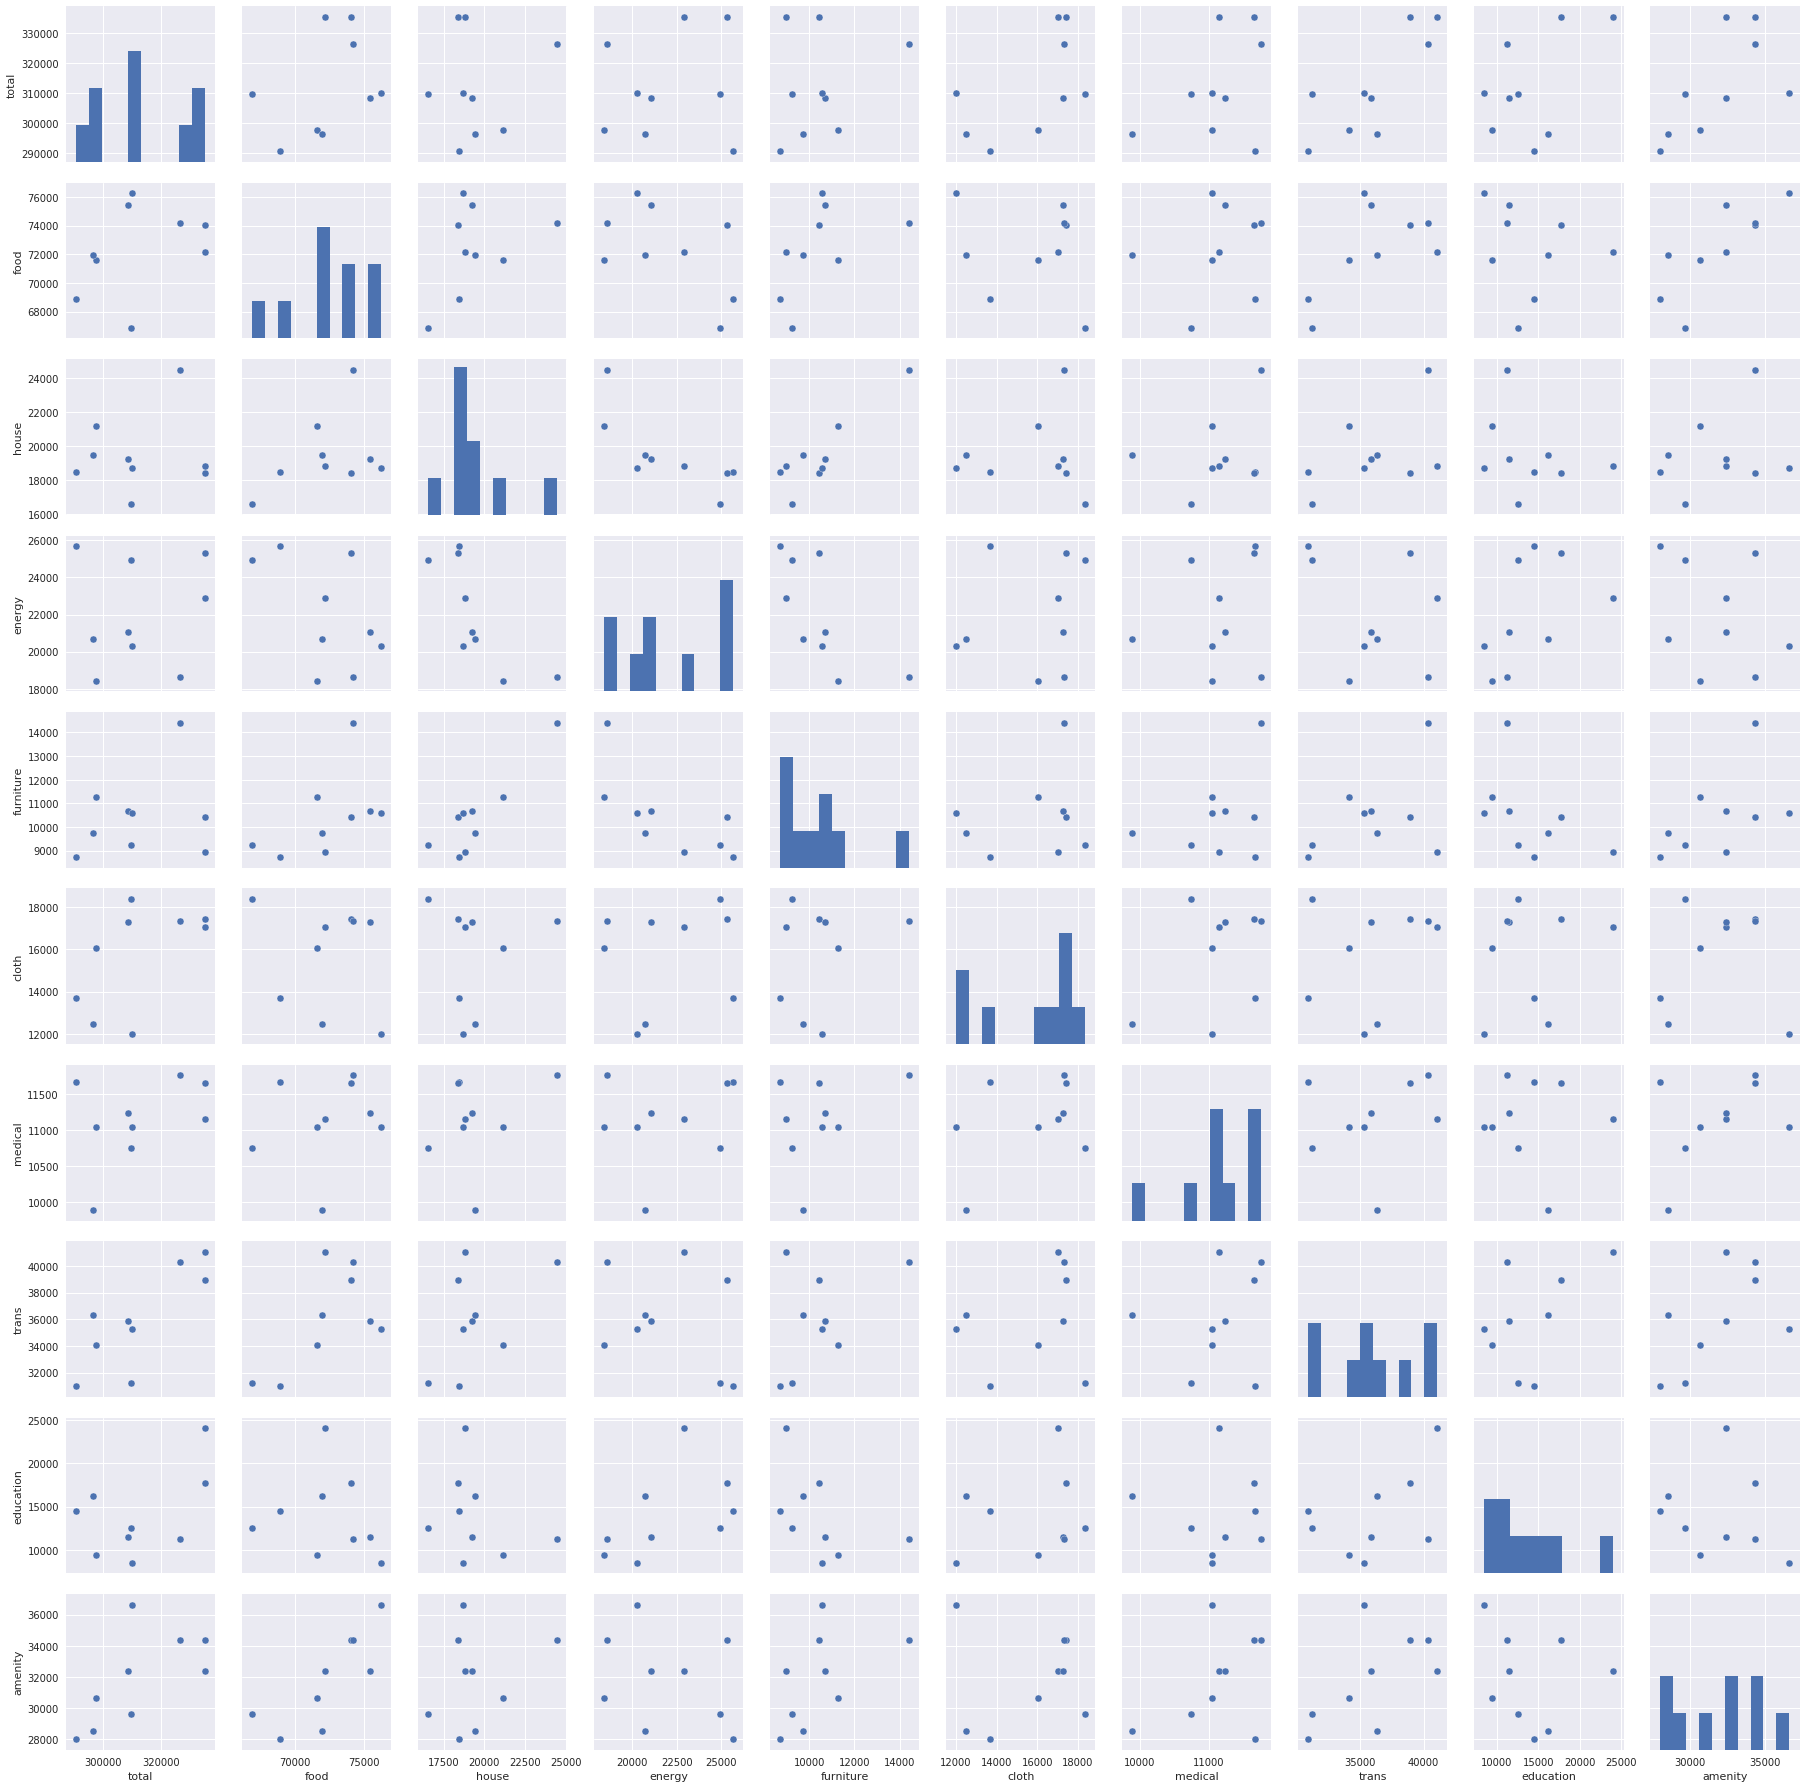

In [47]:
sns.pairplot(df.select_dtypes([np.int64, np.float64]))

## 1. 相関係数を求める

In [5]:
df_corr = df.corr(method="pearson") #ピアソンでの相関係数
df_corr.loc[["total"]] #行の指定表示

,total,food,house,energy,furniture,cloth,medical,trans,education,amenity
total,1.0,0.36482,0.133464,0.112311,0.26487,0.56455,0.407846,0.809912,0.504157,0.646937


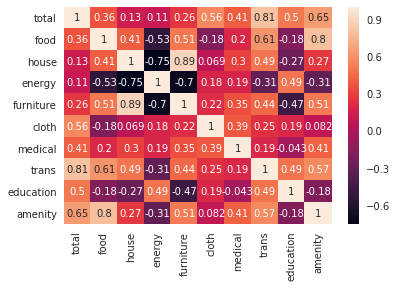

In [7]:
sns.heatmap(df_corr, annot=True) #可視化(annotで数値表示)

## 2. 重回帰分析

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df.drop(columns="total")
X_colum = X.columns
y = df.total

X = np.array(X)
y = np.array(y)

In [30]:
X

array([[66863, 16557, 24955,  9241, 18368, 10749, 31231, 12527, 29620],
       [68872, 18454, 25677,  8721, 13673, 11679, 30968, 14478, 28000],
       [74025, 18399, 25331, 10427, 17428, 11661, 38961, 17698, 34350],
       [72157, 18815, 22908,  8959, 17032, 11153, 41060, 24041, 32382],
       [75402, 19244, 21074, 10685, 17284, 11239, 35889, 11511, 32399],
       [71592, 21145, 18435, 11252, 16037, 11047, 34111,  9375, 30647],
       [74206, 24477, 18610, 14417, 17319, 11764, 40336, 11263, 34338],
       [76242, 18669, 20289, 10575, 12013, 11052, 35290,  8517, 36632],
       [71947, 19445, 20701,  9724, 12473,  9889, 36348, 16241, 28501]])

In [31]:
y

array([309621, 290663, 335341, 335276, 308566, 297648, 326480, 309993,
       296457])

In [32]:
clf = LinearRegression()
clf.fit(X,y) #重回帰分析

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(clf.coef_) #係数
print(clf.intercept_) #切片

[-2.49246967 -1.4214542   1.42400621 -0.56053703  1.35219246  1.19308718
  4.90196429 -0.83202514  2.72979714]
208265.24016486725


In [42]:
coefficient = pd.DataFrame(clf.coef_.reshape(1,9), columns=X_colum, index=["coefficient"])

In [45]:
coefficient

,food,house,energy,furniture,cloth,medical,trans,education,amenity
coefficient,-2.49247,-1.421454,1.424006,-0.560537,1.352192,1.193087,4.901964,-0.832025,2.729797


In [46]:
print("Intercept:", clf.intercept_)

Intercept: 208265.24016486725
